Types of time series data:
- *Timestamps*, specific instants in time
- Fixed *periods*, such as the month January 2007 or the full year 2010
- *Intervals* of time, indicated by a start and end timestamp. Periods can be thought of as special cases of intervals
- Experiment or elapsed time; each timestamp is a measure of time relative to a particular start time.

## 1 Date and Time Data Types and Tools

Python standard library: `datetime`, `time` and `calendar` modules

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [62]:
import matplotlib.pyplot as plt

In [3]:
from datetime import datetime

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2017, 11, 12, 20, 56, 51, 590041)

In [5]:
now.year, now.month, now.day

(2017, 11, 12)

`datetime` stores both the date and time down to the microseconds. `timedelta` represents the temporal difference between two `datetime` object

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [7]:
delta

datetime.timedelta(926, 56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [11]:
from datetime import timedelta

In [12]:
start = datetime(2011, 1, 7)

In [13]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [15]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

<img src='img/11_1_1.png'>

### 1.1 Converting Between String and Datetime

Format datetime objects using `str` or the `strftime` method

In [16]:
stamp = datetime(2011, 1, 3)

In [17]:
str(stamp)

'2011-01-03 00:00:00'

In [18]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

<img src='img/11_1_2.png'>

These same format codes can be used to convert strings to dates with `datetime.strptime`

In [19]:
value = '2011-01-03'

In [20]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [23]:
datestrs = ['7/6/2011', '8/6/2011']

In [24]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

Using the `parser.parse` method of the `dateutil` package to convert string to datetime

In [25]:
from dateutil.parser import parse

In [26]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [27]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

Passing `dayfirst=True` if day appearing before month

In [28]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas is generally oriented toward working with arrays of dates. The `to_datetime` method parses many different kinds of date representations

In [29]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [32]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

It also handles missing values

In [33]:
idx = pd.to_datetime(datestrs + [None])

In [34]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [35]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

In [36]:
?pd.to_datetime

## 2 Time Series Basics

A basic kind of time series object in pandas is a Series indexed by timestamps

In [4]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [5]:
ts = pd.Series(np.random.randn(6), index=dates)

In [6]:
ts

2011-01-02    1.570712
2011-01-05   -1.316611
2011-01-07   -0.734832
2011-01-08   -0.441547
2011-01-10   -1.578222
2011-01-12   -0.062268
dtype: float64

These datetime objects have been put in a DatatimeIndex

In [42]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Like other Series, arithmetic operations automatically align on the dates

In [43]:
ts + ts[::2]

2011-01-02    1.235493
2011-01-05         NaN
2011-01-07   -2.422405
2011-01-08         NaN
2011-01-10   -3.403317
2011-01-12         NaN
dtype: float64

pandas  stores timestamps using NumPy's `datetime64` data type at the nanosecond resolution

In [44]:
ts.index.dtype

dtype('<M8[ns]')

Scalar values from a DatetimeIndex are pandas Timestamp objects

In [45]:
ts.index[0]

Timestamp('2011-01-02 00:00:00')

A `Timestamp` can be substituted anywhere you would use a `datetime` object. Additionally, it has abilities of storing frequency information and dealing with time zone conversions and etc.

### 2.1 Indexing, Selection, Subsetting

In [46]:
stamp = ts.index[2]

In [47]:
ts[stamp]

-1.2112025628444267

as a convenience, you can also pass a string that is interpretable as a date

In [48]:
ts['1/10/2011']

-1.7016586485065794

In [49]:
ts['20110110']

-1.7016586485065794

For longer time series, a year or a year with month can be passed to select slices of data

In [50]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

In [51]:
longer_ts.head()

2000-01-01   -2.975876
2000-01-02    0.016668
2000-01-03    0.763588
2000-01-04    1.394561
2000-01-05    1.564448
Freq: D, dtype: float64

In [53]:
longer_ts['2001'].head()

2001-01-01    0.299106
2001-01-02    0.853992
2001-01-03    1.612081
2001-01-04    0.952879
2001-01-05   -1.561792
Freq: D, dtype: float64

Here, the string '2001' is interpreted as a year.

In [54]:
longer_ts['2001-05']

2001-05-01    0.065944
2001-05-02   -1.023276
2001-05-03   -0.051203
2001-05-04   -0.608367
2001-05-05    1.407096
2001-05-06    0.002727
2001-05-07    0.612694
2001-05-08   -1.345624
2001-05-09    0.452837
2001-05-10    0.501222
2001-05-11    2.181655
2001-05-12    1.065940
2001-05-13   -0.632370
2001-05-14   -1.577974
2001-05-15   -0.081655
2001-05-16    0.264279
2001-05-17    0.607758
2001-05-18   -0.004284
2001-05-19    0.311442
2001-05-20   -1.423109
2001-05-21    0.856808
2001-05-22    0.490765
2001-05-23   -0.400072
2001-05-24   -1.790300
2001-05-25    0.896075
2001-05-26    0.496587
2001-05-27    1.864134
2001-05-28   -1.820402
2001-05-29    0.928935
2001-05-30    0.004858
2001-05-31    0.676150
Freq: D, dtype: float64

Slicing with `datetime` objects works as well

In [56]:
ts[datetime(2011, 1, 7):]

2011-01-07   -1.211203
2011-01-08   -0.608775
2011-01-10   -1.701659
2011-01-12   -0.720548
dtype: float64

Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query

In [57]:
ts

2011-01-02    0.617746
2011-01-05    0.371125
2011-01-07   -1.211203
2011-01-08   -0.608775
2011-01-10   -1.701659
2011-01-12   -0.720548
dtype: float64

In [58]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.211203
2011-01-08   -0.608775
2011-01-10   -1.701659
dtype: float64

The `truncate` method slices a Series between two dates

In [59]:
ts.truncate(after='1/9/2011')

2011-01-02    0.617746
2011-01-05    0.371125
2011-01-07   -1.211203
2011-01-08   -0.608775
dtype: float64

All of this holds true for DataFrame as well

In [60]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [63]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [64]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.588016,1.993915,1.526385,1.336923
2001-05-09,-1.350219,1.886024,0.018154,1.135339
2001-05-16,-0.611997,1.853333,-0.296126,0.660620
2001-05-23,-1.099791,0.266143,0.105998,-1.292795
2001-05-30,0.584104,0.929688,-1.240518,0.976999


### 2.2 Time Series with Duplicate Indices

In [65]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [66]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [67]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [69]:
dup_ts.index.is_unique

False

Indexing into this time series will now either produce scalar values or slices depending on whether a timestamp is duplicated

In [70]:
dup_ts['1/3/2000']

4

In [71]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

Aggregate the data having non-unique timestamps

In [74]:
grouped = dup_ts.groupby(level=0)

In [75]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [76]:
dup_ts.mean(level=0)

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

## 3 Date Range, Frequencies, and Shifting

pandas has a full suite of standard time series frequencies and tools for resampling, inferring frequencies and generating fixed-frequency date ranges

Converting the sample time series to be fixed daily frequency by calling `resample`

In [7]:
ts

2011-01-02    1.570712
2011-01-05   -1.316611
2011-01-07   -0.734832
2011-01-08   -0.441547
2011-01-10   -1.578222
2011-01-12   -0.062268
dtype: float64

In [8]:
resampler = ts.resample('D')

The string 'D' is interpreted as daily frequency

### 3.1 Generating Date Ranges

`pandas.date_range` is responsible for generating a DatetimeIndex with an indicated length according to a particular frequency. By default, it generates daily timestamps

In [10]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [11]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

If only pass a start or end date, you must pass a number of periods to generate

In [12]:
pd.date_range(start='2012-04-01', periods=10)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10'],
              dtype='datetime64[ns]', freq='D')

In [13]:
pd.date_range(start='2012-04-10', periods=10)

DatetimeIndex(['2012-04-10', '2012-04-11', '2012-04-12', '2012-04-13',
               '2012-04-14', '2012-04-15', '2012-04-16', '2012-04-17',
               '2012-04-18', '2012-04-19'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

<img src='img/11_3_1.png'>

`date_range` by default preserves the time of the start or end timestamp

In [14]:
pd.date_range('2012-05-02 12:55:01', periods=5)

DatetimeIndex(['2012-05-02 12:55:01', '2012-05-03 12:55:01',
               '2012-05-04 12:55:01', '2012-05-05 12:55:01',
               '2012-05-06 12:55:01'],
              dtype='datetime64[ns]', freq='D')

Normalizing a set of timestamps to midnight

In [15]:
pd.date_range('2012-05-02 12:55:01', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 3.2 Frequencies and Date Offsets

Frequencies in pandas are composed of a ***base frequency*** and a multiplier. Base frequencies are referred to by a string alias, 'M', 'H'. For each base frequency, there is an object defined as a ***date offest***. For example, hourly frequency can be represented with the `hour` class

In [16]:
from pandas.tseries.offsets import Hour, Minute

In [17]:
hour = Hour()

In [18]:
hour

<Hour>

Define a multiple of an offset

In [19]:
four_hours = Hour(4)

In [20]:
four_hours

<4 * Hours>

Instead of create one of these objects, putting an integer before the base frequency creates a multiple

In [21]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

Many offsets can be combined together by addition

In [23]:
Hour(2) + Minute(30)

<150 * Minutes>

You can also pass frequency string, like '1h30min'

In [24]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

Some frequencies describe points in time that are not evenly spaced. For example, 'M' (calendar month end) and 'BM' (last weekday of month). We refer to these as ***anchored offsets***

***Week of month dates***. Geting the third Friday of each month

In [25]:
pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### 3.3 Shifting (Leading and Lagging) Data

"Shifting" refers to moving data backward and forward through time.

In [26]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [27]:
ts

2000-01-31    1.757448
2000-02-29   -0.656893
2000-03-31   -1.199889
2000-04-30   -1.057946
Freq: M, dtype: float64

In [28]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.757448
2000-04-30   -0.656893
Freq: M, dtype: float64

In [29]:
ts.shift(-2)

2000-01-31   -1.199889
2000-02-29   -1.057946
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

Computing percent changes in a time series

In [30]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -1.373776
2000-03-31    0.826614
2000-04-30   -0.118297
Freq: M, dtype: float64

If the frequency is known, it can be passed to `shift` to advance the timestamps instead of simply the data

In [31]:
ts.shift(2, freq='M')

2000-03-31    1.757448
2000-04-30   -0.656893
2000-05-31   -1.199889
2000-06-30   -1.057946
Freq: M, dtype: float64

Other frequencies can be passed too.

In [32]:
ts.shift(3, freq='D')

2000-02-03    1.757448
2000-03-03   -0.656893
2000-04-03   -1.199889
2000-05-03   -1.057946
dtype: float64

In [33]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.757448
2000-02-29 01:30:00   -0.656893
2000-03-31 01:30:00   -1.199889
2000-04-30 01:30:00   -1.057946
Freq: M, dtype: float64

The pandas date offsets can also be used with `datetime` or `Timestamp` object

In [34]:
from pandas.tseries.offsets import Day, MonthEnd

In [35]:
now = datetime(2011, 11 ,17)

In [36]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

If you add an anchored offset like `MonthEnd`, the first increment will "roll forward" a date to the next date according to the frequency rule

In [37]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [38]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

Anchored offsets can explicitly "roll" dates forward or backward by using their `rollforward` and `rollback` methods

In [39]:
offset = MonthEnd()

In [40]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [41]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

Using date offsets with groupby

In [44]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4D'))

In [43]:
ts

2000-01-15    1.077253
2000-01-19    0.218539
2000-01-23    0.835824
2000-01-27    0.571790
2000-01-31   -0.275886
2000-02-04   -1.191776
2000-02-08    0.218841
2000-02-12   -0.419332
2000-02-16    0.264147
2000-02-20    1.437101
2000-02-24    0.763195
2000-02-28    0.447808
2000-03-03    0.358510
2000-03-07   -1.191388
2000-03-11    0.030461
2000-03-15    0.326578
2000-03-19    0.287895
2000-03-23   -1.155579
2000-03-27    0.745463
2000-03-31   -0.678074
Freq: 4D, dtype: float64

In [45]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.278883
2000-02-29    0.664805
2000-03-31    0.097215
dtype: float64

An easier and faster way to do this is using `resample`

In [46]:
ts.resample('M').mean()

2000-01-31   -0.278883
2000-02-29    0.664805
2000-03-31    0.097215
Freq: M, dtype: float64

## 4 Time Zone Handling

In [47]:
import pytz

In [48]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

To get a time zone object from `pytz`, use `pytz.timezone`

In [49]:
tz = pytz.timezone('America/New_York')

In [50]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

Methods in pandas will accept either time zone names or these objects

### 4.1 Time Zone Localization and Conversion

By default, time series in pandas are time zone naive.

In [51]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [52]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [53]:
ts

2012-03-09 09:30:00    0.130934
2012-03-10 09:30:00   -0.093016
2012-03-11 09:30:00   -1.026651
2012-03-12 09:30:00   -1.094543
2012-03-13 09:30:00    0.995108
2012-03-14 09:30:00    0.371538
Freq: D, dtype: float64

In [54]:
print ts.index.tz

None


Date ranges can be generated with a time zone set

In [55]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Conversion from naive to localized is handled by the `tz_localize` method

In [56]:
ts

2012-03-09 09:30:00    0.130934
2012-03-10 09:30:00   -0.093016
2012-03-11 09:30:00   -1.026651
2012-03-12 09:30:00   -1.094543
2012-03-13 09:30:00    0.995108
2012-03-14 09:30:00    0.371538
Freq: D, dtype: float64

In [57]:
ts_utc = ts.tz_localize('UTC')

In [58]:
ts_utc

2012-03-09 09:30:00+00:00    0.130934
2012-03-10 09:30:00+00:00   -0.093016
2012-03-11 09:30:00+00:00   -1.026651
2012-03-12 09:30:00+00:00   -1.094543
2012-03-13 09:30:00+00:00    0.995108
2012-03-14 09:30:00+00:00    0.371538
Freq: D, dtype: float64

In [59]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Once a time series has been localized to a particular time zone, it can be converted to another time zone with `tz_convert`

In [61]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.130934
2012-03-10 04:30:00-05:00   -0.093016
2012-03-11 05:30:00-04:00   -1.026651
2012-03-12 05:30:00-04:00   -1.094543
2012-03-13 05:30:00-04:00    0.995108
2012-03-14 05:30:00-04:00    0.371538
Freq: D, dtype: float64

`tz_localize` and `tz_convert` are also instance methods on DatetimeIndex

In [62]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 4.2 Operations with Time Zone-Aware Timestamp Objects

Individual Timestamp objects similarly can be localized from naive to time zone-aware and converted from one time zone to another

In [63]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [64]:
stamp_utc = stamp.tz_localize('utc')

In [65]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

You can also pass a time zone when creating the Timestamp

In [66]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [67]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

Time zone-aware Timestamp objects internally store a UTC timestamp value as nano-seconds ince the Unix epoch (Jan 1, 1970); this UTC value is invariant between time zone conversion.

In [68]:
stamp_utc.value

1299902400000000000

In [69]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

When performing time arithmetic using pandas's DateOffest objects, pandas respects daylight saving time transition where possible

In [74]:
from pandas.tseries.offsets import Hour

In [81]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [82]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [83]:
stamp + Hour(2)

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 4.3 Operations Between Different Time Zones

If two time series with different time zones are combined, the result will be UTC by default.

In [84]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [85]:
ts = pd.Series(np.random.randn(10), index=rng)

In [86]:
ts

2012-03-07 09:30:00    1.109756
2012-03-08 09:30:00    1.577598
2012-03-09 09:30:00   -0.701780
2012-03-12 09:30:00   -0.428736
2012-03-13 09:30:00   -0.784682
2012-03-14 09:30:00    1.046580
2012-03-15 09:30:00    0.038013
2012-03-16 09:30:00    0.345448
2012-03-19 09:30:00   -0.304008
2012-03-20 09:30:00    0.371881
Freq: B, dtype: float64

In [93]:
ts1 = ts[:7].tz_localize('Europe/London')

In [95]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [96]:
(ts1 + ts2).index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [98]:
(ts1 + ts2).index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 5 Periods and Period Arithmetic

Periods represent timespans, like days, months, quarters, or years. The `Period` class represents this data type, requiring a string or integer and a frequency.

In [4]:
p = pd.Period(2007, freq='A-DEC')

In [5]:
p

Period('2007', 'A-DEC')

In this case, the `Period` object represents the full timespan fomr Jan 1, 2007, to Dec 31, 2007, inclusive. Adding and subtracting integers from periods has the effect of shifting by their frequency

In [7]:
p + 5

Period('2012', 'A-DEC')

In [8]:
p - 2

Period('2005', 'A-DEC')

If two periods have the same frequency, their difference is the number of units between them

In [10]:
pd.Period('2014', freq='A-DEC') - p

7

Regular ranges of periods can be constructed with the `period_range` function

In [12]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [13]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

The `PeriodIndex` class stores a sequence of periods and can serve as an axis index in any pandas data structure

In [16]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.558535
2000-02   -1.154113
2000-03   -1.206858
2000-04    0.485368
2000-05   -1.298664
2000-06   -0.136831
Freq: M, dtype: float64

Convert an array of strings to period

In [19]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [20]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [21]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 5.1 Period Frequency Conversion

Periods and PeriodIndex objects can be converted to another frequency with their `asfreq` method. 

In [23]:
p = pd.Period('2007', freq='A-DEC')

In [24]:
p

Period('2007', 'A-DEC')

In [25]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [26]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

The `Period('2007', 'A-DEC')` can be thought as a sort of cursor pointing to a span of time, subdivided by monthly periods

<img src='img/11_5_1.png'>

For a fiscal year ending on a month other than December, the corresponding monthly subperiods are different. When you are converting from high to low frequency, pandas determines the super-period depending on where the subperiod "belongs"

In [27]:
p = pd.Period('2007', freq='A-JUN')

In [28]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [29]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

Whole `PeriodIndex` objects or time series can be similarly converted with the same semantics

In [30]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [31]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [32]:
ts

2006   -0.621031
2007   -0.805031
2008    0.829444
2009   -0.188070
Freq: A-DEC, dtype: float64

In [34]:
ts.asfreq('B', how='end')

2006-12-29   -0.621031
2007-12-31   -0.805031
2008-12-31    0.829444
2009-12-31   -0.188070
Freq: B, dtype: float64

### 5.2 Quarterly Period Frequencies

<img src='img/11_5_2_1.png'>

Getting the timestamp at 4 PM on the second-to-last business day of the quarter

In [35]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [36]:
p4pm = (p.asfreq('B', 'end') - 1).asfreq('T', 's') + 16 * 60

In [37]:
p4pm

Period('2012-01-30 16:00', 'T')

In [38]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

Arithmetic is identical when applying to quarterly ranges

In [17]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [18]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [19]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [20]:
new_rng = (rng.asfreq('B', 'end') - 1).asfreq('T', 'start') + 16 * 60

In [21]:
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00'],
            dtype='period[T]', freq='T')

In [43]:
ts.index = new_rng.to_timestamp()

In [44]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### 5.3 Converting Timestamps to Periods (and Back)

Series and DataFrame objects indexed by timestamps can be converted to periods with `to_period` method:

In [37]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [38]:
ts = pd.Series(np.random.randn(3), index=rng)

In [39]:
ts

2000-01-31    1.429503
2000-02-29    0.040583
2000-03-31   -1.710557
Freq: M, dtype: float64

In [40]:
pts = ts.to_period()

In [41]:
pts

2000-01    1.429503
2000-02    0.040583
2000-03   -1.710557
Freq: M, dtype: float64

The frequency of the new PeriodIndex is inferred from the timestamps by default. But it can be specified.

In [42]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [43]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [44]:
ts2

2000-01-29   -0.033326
2000-01-30   -0.443498
2000-01-31    0.254325
2000-02-01   -0.119558
2000-02-02   -0.927364
2000-02-03   -2.931342
Freq: D, dtype: float64

In [45]:
ts2.to_period('M')

2000-01   -0.033326
2000-01   -0.443498
2000-01    0.254325
2000-02   -0.119558
2000-02   -0.927364
2000-02   -2.931342
Freq: M, dtype: float64

To convert back to timestamps, use `to_timestamp`

In [52]:
pts = ts2.to_period()

In [53]:
pts

2000-01-29   -0.033326
2000-01-30   -0.443498
2000-01-31    0.254325
2000-02-01   -0.119558
2000-02-02   -0.927364
2000-02-03   -2.931342
Freq: D, dtype: float64

In [54]:
pts.to_timestamp(how='end')

2000-01-29   -0.033326
2000-01-30   -0.443498
2000-01-31    0.254325
2000-02-01   -0.119558
2000-02-02   -0.927364
2000-02-03   -2.931342
Freq: D, dtype: float64

### 5.4 Creating a PeriodIndex from Arrays

Sometimes timespan information spread across multiple columns.

In [25]:
data = pd.read_csv('examples/macrodata.csv')

In [26]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


By passing these arrays to PeriodIndex with a frequency, you can comine them to form an index for the DataFrame

In [27]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')

In [28]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

## 6 Resampling and Frequency Conversion

***Resampling*** refers to the process of converting a time series from one frequency to another.
- Aggregating higher frequency data to lower frequency is called ***downsampling***
- Converting lower frequency to higher frequency is called ***upsampling***

pandas object has a `resample` method for all frequency conversion. It has a similar API to `groupby`. You call resample to group the data, then call an aggregation function

In [30]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [32]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [33]:
ts.head()

2000-01-01   -0.632424
2000-01-02   -0.322806
2000-01-03   -0.334349
2000-01-04   -0.222032
2000-01-05   -0.688973
Freq: D, dtype: float64

In [34]:
ts.resample('M').mean()

2000-01-31   -0.331796
2000-02-29   -0.099445
2000-03-31    0.112890
2000-04-30   -0.497239
Freq: M, dtype: float64

In [35]:
ts.resample('M', kind='period').mean()

2000-01   -0.331796
2000-02   -0.099445
2000-03    0.112890
2000-04   -0.497239
Freq: M, dtype: float64

`resample` is a flexible and high-performance method that can be used to process very large time series.

<img src='img/11_6_1.png'>

### 6.1 Downsampling

Two things to think about when using `resample` to downsample data:
- Which side of each interval is closed
- How to label each aggregated bin, either with the start of the interval or the end

In [55]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [56]:
ts = pd.Series(np.random.randn(12), index=rng)

In [57]:
ts

2000-01-01 00:00:00    0.688631
2000-01-01 00:01:00   -1.272261
2000-01-01 00:02:00   -0.880190
2000-01-01 00:03:00   -1.577120
2000-01-01 00:04:00    2.157634
2000-01-01 00:05:00   -0.527114
2000-01-01 00:06:00    0.442233
2000-01-01 00:07:00    0.489992
2000-01-01 00:08:00    0.751929
2000-01-01 00:09:00   -0.314245
2000-01-01 00:10:00    1.334553
2000-01-01 00:11:00   -0.211692
Freq: T, dtype: float64

In [59]:
ts.resample('5min').sum()

2000-01-01 00:00:00   -0.883307
2000-01-01 00:05:00    0.842795
2000-01-01 00:10:00    1.122862
Freq: 5T, dtype: float64

In [60]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00    0.688631
2000-01-01 00:00:00   -2.099051
2000-01-01 00:05:00    2.704462
2000-01-01 00:10:00   -0.211692
Freq: 5T, dtype: float64

The resulting time series is labeld by the timestamps from the left side of each bin. By passing `label='right'` you can label them with the right bin edge

In [62]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00    0.688631
2000-01-01 00:05:00   -2.099051
2000-01-01 00:10:00    2.704462
2000-01-01 00:15:00   -0.211692
Freq: 5T, dtype: float64

<img src='img/11_6_2.png'>

Shifting the result index by some amount

In [63]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59    0.688631
2000-01-01 00:04:59   -2.099051
2000-01-01 00:09:59    2.704462
2000-01-01 00:14:59   -0.211692
Freq: 5T, dtype: float64

### 6.2 Upsampling and Interpolation

In [4]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas',
                              'New York', 'Ohio'])

In [5]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.648414,0.039421,0.468209,-0.130295
2000-01-12,0.699747,1.790145,0.341032,-0.252357


Using the `asfreq` method to convert to the higher frequency without any aggregation

In [7]:
frame.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [8]:
df_daily = frame.resample('D').asfreq()

In [9]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.648414,0.039421,0.468209,-0.130295
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.699747,1.790145,0.341032,-0.252357


In [10]:
df_daily.index

DatetimeIndex(['2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12'],
              dtype='datetime64[ns]', freq='D')

Fill forward missing value

In [14]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.648414,0.039421,0.468209,-0.130295
2000-01-06,-0.648414,0.039421,0.468209,-0.130295
2000-01-07,-0.648414,0.039421,0.468209,-0.130295
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.699747,1.790145,0.341032,-0.252357


### 6.3 Resampling with Periods

Rules about upsampling and downsampling periods:
- In downsampling, the target frequency must be a subperiod of the source frequency
- In upsampling, the target frequency must be a superperiod of the source frequency
Otherwise, an exception will be raised.

Resampling data indexed by periods is similar to timestamps

In [15]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas',
                              'New York', 'Ohio'])

In [16]:
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,-2.770643,1.019038,-0.432883,-1.301231
2000-02,0.795413,0.982861,0.489725,1.837268
2000-03,0.920041,-1.104070,0.624403,1.786606
2000-04,-0.959565,-1.003060,1.513055,-0.101332
2000-05,0.374028,2.331811,0.410602,-1.390135


In [17]:
annual_frame = frame.resample('A-DEC').mean()

In [18]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.075334,0.176082,0.417451,0.221403
2001,0.419582,0.631050,0.069026,-0.433894


You must decide about which end of the timespan in the new frequency to place the values. The `convention` argument defaults to `start` but can also be `end`

In [19]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.075334,0.176082,0.417451,0.221403
2000Q2,-0.075334,0.176082,0.417451,0.221403
2000Q3,-0.075334,0.176082,0.417451,0.221403
2000Q4,-0.075334,0.176082,0.417451,0.221403
2001Q1,0.419582,0.631050,0.069026,-0.433894
2001Q2,0.419582,0.631050,0.069026,-0.433894
2001Q3,0.419582,0.631050,0.069026,-0.433894
2001Q4,0.419582,0.631050,0.069026,-0.433894


In [20]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.075334,0.176082,0.417451,0.221403
2001Q1,-0.075334,0.176082,0.417451,0.221403
2001Q2,-0.075334,0.176082,0.417451,0.221403
2001Q3,-0.075334,0.176082,0.417451,0.221403
2001Q4,0.419582,0.631050,0.069026,-0.433894


In [21]:
annual_frame.resample('Q-DEC').asfreq()

,Colorado,Texas,New York,Ohio
2000Q1,-0.075334,0.176082,0.417451,0.221403
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.419582,0.631050,0.069026,-0.433894
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


## 7 Moving Window Functions

Load up some time series data and resample to business day frequency

In [55]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [56]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [58]:
close_px.head(10)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [61]:
close_px = close_px.resample('B').ffill()

`rolling` operator behaves similarly to resample and groupby. It can be called on a Series or Dataframe along with a time window (expressed as a number of periods)

250-day moving window average of stock price

In [67]:
plt.rc('figure', figsize=(10,8))

In [71]:
close_px.AAPL.plot()

In [72]:
close_px.AAPL.rolling(250).mean().plot()

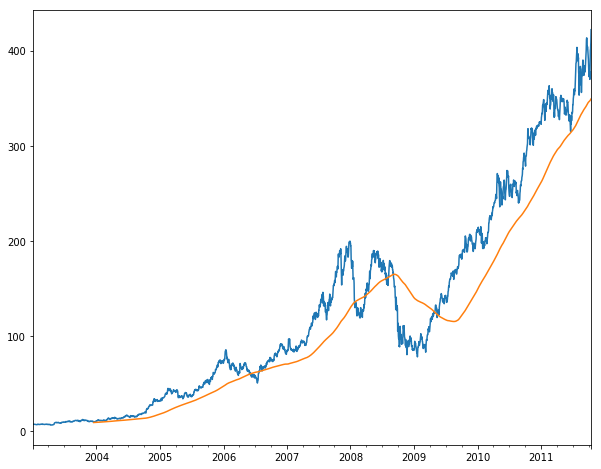

In [73]:
plt.show()

In [74]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [75]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

In [76]:
appl_std250.plot()

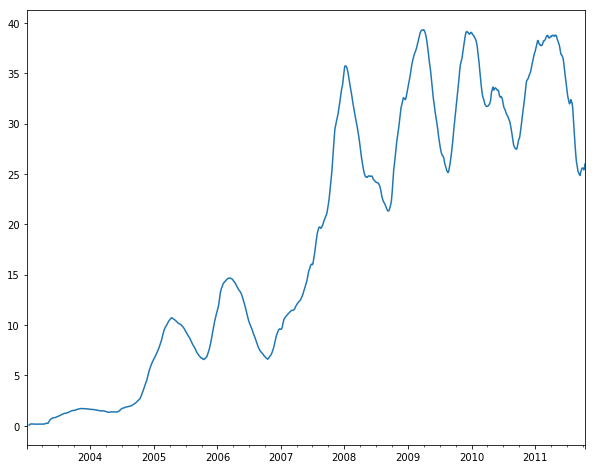

In [77]:
plt.show()

Using expanding operator to compute an expanding window aggregation that starts the time window from the bieginning of the time series and increases the size of the window until it encompasses the whole series

In [112]:
wind_mean = close_px.AAPL.rolling(250).mean()

In [113]:
expand_mean = wind_mean.expanding().mean()

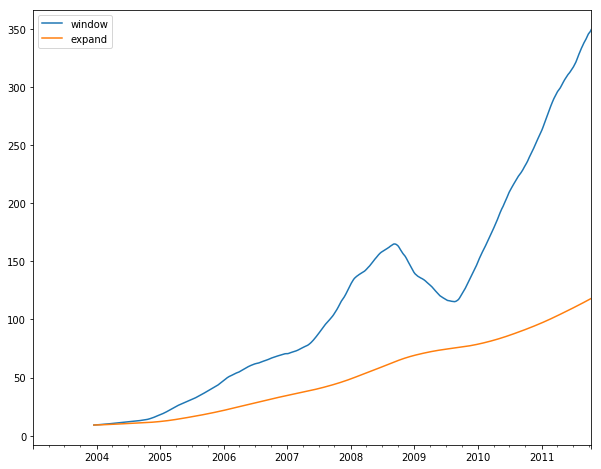

In [114]:
wind_mean.plot(label='window')
expand_mean.plot(label='expand')
plt.legend()
plt.show()

Calling a moving window function on a DataFrame applies the transformation to each column

In [85]:
close_px.rolling(60).mean().plot(logy=True)

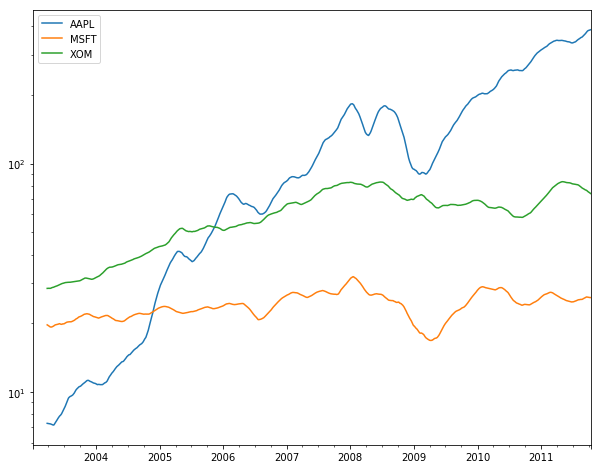

In [86]:
plt.show()

The `rolling` function also accepts a string indicating a fixed-size time offset rather than a set number of periodss, which can be useful for irregular time series. It will ignore the missing date.

In [105]:
close_px.rolling('3D').mean().head()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.450000,21.520000,29.960000
2003-01-07,7.440000,21.725000,29.455000
2003-01-08,7.386667,21.586667,29.246667


In [106]:
close_px.rolling(3).mean().head()

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.443333,21.530000,29.383333
2003-01-08,7.386667,21.586667,29.246667


In [107]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


### 7.1 Exponentially Weighted Functions

In [117]:
aapl_px = close_px.AAPL['2006':'2007']

In [119]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [120]:
ema60 = aapl_px.ewm(span=30).mean()

In [121]:
ma60.plot(style='k--', label='Simple MA')
ema60.plot(style='k-', label='EW MA')

In [122]:
plt.legend()

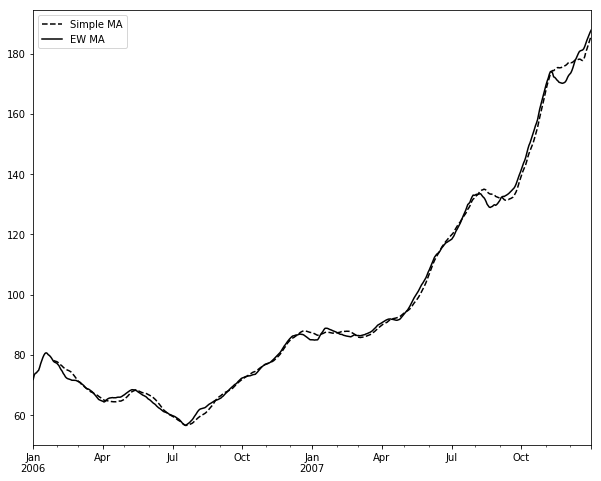

In [123]:
plt.show()

### 7.2 Binary Moving Window Functions

Some statistical operators, like correlation and covariance, need to operate on two time series.

In [124]:
spx_px = close_px_all['SPX']

In [125]:
spx_rets = spx_px.pct_change()

In [126]:
returns = close_px.pct_change()

The `corr` aggregation function after we call `rolling` can then compute the rolling correlation with `spx_rets`

In [127]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

In [128]:
corr.plot()

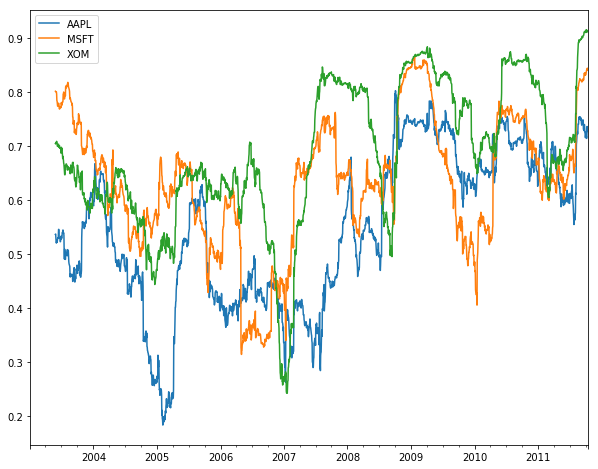

In [129]:
plt.show()

### 7.3 User-Defined Moving Window Functions

The `apply` method on rolling and related methods provides a means to apply an array function of your own devising over a moving window. The only requirement is that the function produce a single value from each piece of the array.

In [130]:
from scipy.stats import percentileofscore

In [131]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [132]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

In [133]:
result.plot()

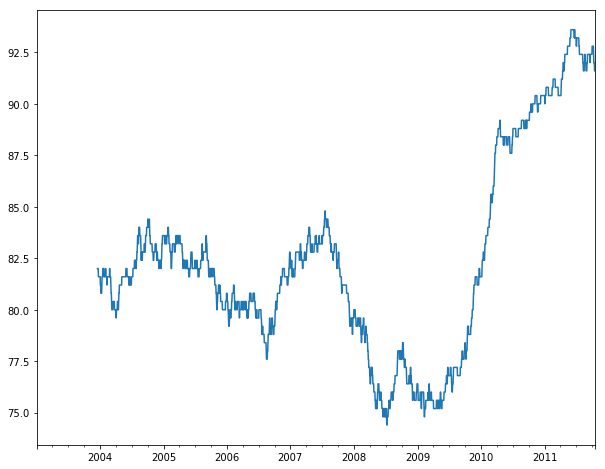

In [134]:
plt.show()